##1. Importing and Loading the data

In [4]:
import pandas as pd

#transfusion_data = pd.read_csv('/content/drive/MyDrive/Datasets/transfusion.data')

filepath = 'C:\\Users\\Devika\\Documents\\New folder\\transfusion.data'
# above .data file is comma delimited
transfusion_data = pd.read_csv(filepath, delimiter=",")

transfusion_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
transfusion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
transfusion_data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
{column: len(transfusion_data[column].unique())for column in transfusion_data.columns}

{'Recency (months)': 31,
 'Frequency (times)': 33,
 'Monetary (c.c. blood)': 33,
 'Time (months)': 78,
 'whether he/she donated blood in March 2007': 2}

In [7]:
transfusion_data.shape

(748, 5)

In [8]:
transfusion_data.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

##2.Creating the target data and Renaming the columns


In [9]:
transfusion_data.rename(
    columns={'whether he/she donated blood in March 2007': 'target', 'Recency (months)':'Recency',
             'Frequency (times)': 'Frequency','Monetary (c.c. blood)':'Monetary',	'Time (months)':'Time'},
    inplace=True
)

transfusion_data.head()

,Recency,Frequency,Monetary,Time,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


##3. Checking target incidence

In [10]:
data = transfusion_data.drop(columns="target")
target = transfusion_data["target"]

In [11]:
transfusion_data.target.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: target, dtype: float64

In [12]:
transfusion_data.groupby("target").agg({"Recency":"mean"})

,Recency
target,
0,10.771930
1,5.455056


In [13]:
transfusion_data.groupby("target").agg({"Frequency":"mean"})

,Frequency
target,
0,4.801754
1,7.797753


In [14]:
transfusion_data.groupby("target").agg({"Monetary":"mean"})

,Monetary
target,
0,1200.438596
1,1949.438202


##4. Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

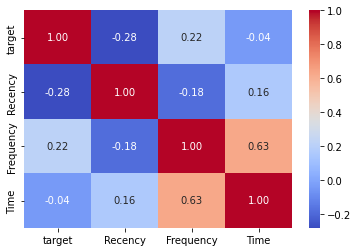

In [19]:
g = sns.heatmap(transfusion_data[["target", "Recency","Frequency","Time"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

No of times they have donated since first donation have a good correlation with the target probability.

It doesn't mean that the other features are not usefull. Frequency features can be correlated with the target. To determine this, we need to explore in detail these features.


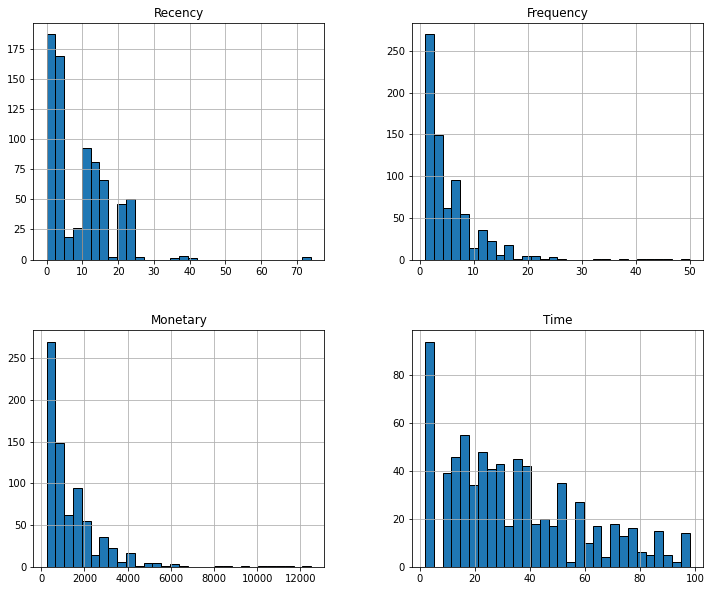

In [21]:
_ = data.hist(figsize=(12, 10), bins=30, edgecolor="black")

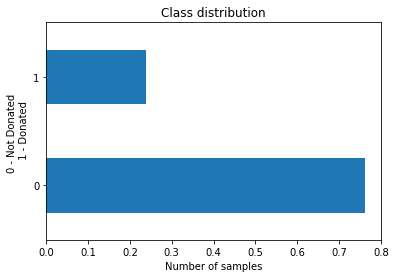

In [22]:
target.value_counts(normalize=True).plot.barh()
plt.xlabel("Number of samples")
plt.ylabel("0 - Not Donated \n 1 - Donated")
_ = plt.title("Class distribution")

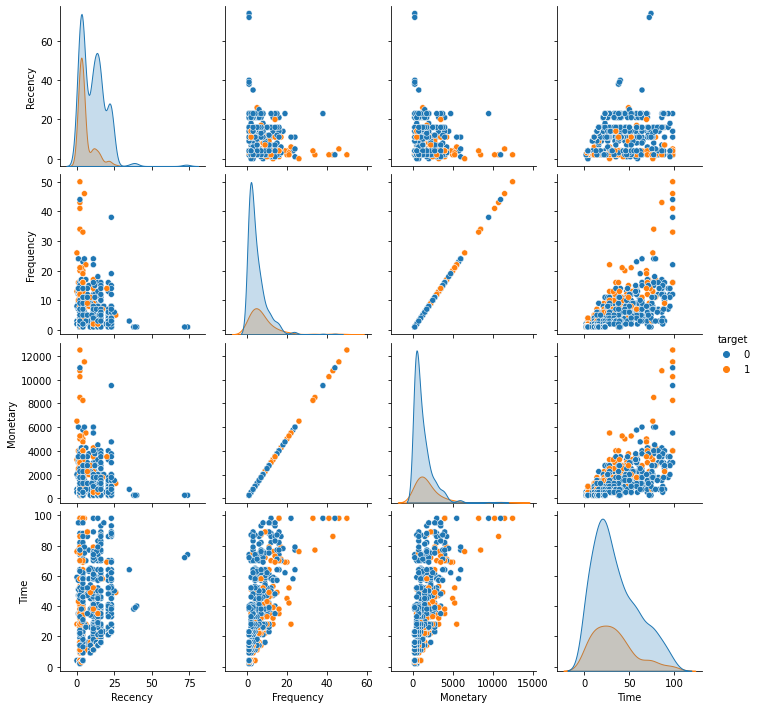

In [23]:
_ = sns.pairplot(transfusion_data, hue="target")

From this plot, we can see that frequency and monetary is highl correlated. so, we can use only the frequency.

##5. Splitting transfusion_data into train and test datasets

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.25,
                                                  random_state=42,stratify=transfusion_data.target)
#X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.3,random_state=0,stratify=transfusion_data.target)
X_train.head(4)


,Recency,Frequency,Monetary,Time
334,16,2,500,16
99,5,7,1750,26
116,2,7,1750,46
661,16,2,500,16


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)

X_train = pd.DataFrame(scaler.transform(X_train),index=X_train.index , columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns=X_test.columns)

# 6. Training a model

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [138]:
from sklearn import svm
classifier1 = svm.SVC(kernel='linear')
classifier1.fit(X_train,y_train)

SVC(kernel='linear')

In [139]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=50)
classifier2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [140]:
from sklearn.linear_model import LogisticRegression
classifier3=LogisticRegression()
classifier3.fit(X_train, y_train)

LogisticRegression()

In [141]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier()
classifier4 = classifier4.fit(X_train,y_train)

# 7. Model Evaluation

In [142]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [143]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

**SVM**

In [150]:
y_pred1 = classifier1.predict(X_test)
result1 = accuracy_score(y_pred1, y_test)
print("Accuracy:",result1)
print(classification_report(y_test,y_pred1))

Accuracy: 0.7647058823529411
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       143
           1       0.00      0.00      0.00        44

    accuracy                           0.76       187
   macro avg       0.38      0.50      0.43       187
weighted avg       0.58      0.76      0.66       187



**Random Forest**

In [151]:
y_pred2 = classifier2.predict(X_test)

result2 = accuracy_score(y_test,y_pred2)
print("Accuracy:",result2)
print(classification_report(y_test,y_pred2))

Accuracy: 0.7165775401069518
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       143
           1       0.38      0.32      0.35        44

    accuracy                           0.72       187
   macro avg       0.59      0.58      0.58       187
weighted avg       0.70      0.72      0.71       187



**Logistic Regression**

In [152]:
y_pred3 = classifier3.predict(X_test)

result3 = accuracy_score(y_test,y_pred3)
print("Accuracy:",result3)
print(classification_report(y_test,y_pred3))

Accuracy: 0.7700534759358288
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       143
           1       0.57      0.09      0.16        44

    accuracy                           0.77       187
   macro avg       0.67      0.53      0.51       187
weighted avg       0.73      0.77      0.70       187



**Decision Tree**

In [153]:
y_pred4 = classifier4.predict(X_test)

result4 = accuracy_score(y_test,y_pred4)
print("Accuracy:",result4)
print(classification_report(y_test,y_pred4))


Accuracy: 0.6951871657754011
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       143
           1       0.33      0.30      0.31        44

    accuracy                           0.70       187
   macro avg       0.56      0.56      0.56       187
weighted avg       0.68      0.70      0.69       187



**Accuracies of each model**

In [154]:
print("SVM                 :", "{:.2f}%".format(result1*100))
print("Random Forest       :", "{:.2f}%".format(result2*100))
print("Logistic Regression :", "{:.2f}%".format(result3*100))
print("Decision Tree       :", "{:.2f}%".format(result4*100))

SVM                 : 76.47%
Random Forest       : 71.66%
Logistic Regression : 77.01%
Decision Tree       : 69.52%


**Logistic Regresion**

In [155]:
import numpy as np
# normalize the column
col_norm = ["Monetary"]

# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Log normalization
for df_norm in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_norm['log_monetary'] = np.log(df_norm[col_norm])
    # Drop the original column
    df_norm.drop(columns=col_norm, inplace=True)

In [156]:
print("X_train Value\n")
print(X_train.head())
print("------------------------")
print("X_train_normed Value\n")
print(X_train_normed.head())

X_train Value

     Recency  Frequency  Monetary  Time
334       16          2       500    16
99         5          7      1750    26
116        2          7      1750    46
661       16          2       500    16
154        2          1       250     2
------------------------
X_train_normed Value

     Recency  Frequency  Time  log_monetary
334       16          2    16      6.214608
99         5          7    26      7.467371
116        2          7    46      7.467371
661       16          2    16      6.214608
154        2          1     2      5.521461


In [157]:
# Comparing the variance for X_train and X_train_normed
print("X_train Variance\n")
print(X_train.var().round(2))
print("------------------------")
print("X_train_normed Variance\n")
print(X_train_normed.var().round(2))

X_train Variance

Recency           66.93
Frequency         33.83
Monetary     2114363.70
Time             611.15
dtype: float64
------------------------
X_train_normed Variance

Recency          66.93
Frequency        33.83
Time            611.15
log_monetary      0.84
dtype: float64


In [158]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=25.0, random_state=42)
# Train the model
logreg.fit(X_train_normed, y_train)

LogisticRegression(C=25.0, random_state=42)

In [159]:
#predicting on the test data
prediction = logreg.predict(X_test)

In [160]:
#Confusion matrix
confusion_matrix(prediction,y_test)

array([[98, 41],
       [45,  3]])

In [161]:
pred_report = pd.DataFrame(prediction.tolist(),columns=["target"])
# saving the prediction
pred_report.to_csv("final_submission.csv")

From the above accuracies, we can see the models that has high accuracy is KNN and XG boost and Logitic regression algorithms.

Now we can approach the people who are interested in donating blood and which will results in getting more volunteers and we can save more people.